In [1]:
import os
import time
import requests
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path
from requests.auth import HTTPBasicAuth
from client import client_id, client_secret

In [2]:
rootdir = Path('C:/Users/Chris/Desktop/Project 1/Top Country CSV')

file_list = [f for f in rootdir.glob("*.csv") if f.is_file()]

In [3]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

In [4]:
token_headers = {'authorization': f"Bearer {token}"}

country = []
pop_popularity = []

search_artist_url = "https://api.spotify.com/v1/artists/"

for file in file_list:
    country_name = str(file).split("\\")[-1].split("_")[0]
    country.append(country_name)
          
    excel_df = pd.read_csv(file)
    
    pop_popularity.append(0)
    
    for artist_id in excel_df["Artist ID"]:
        artist_url = search_artist_url + artist_id
        
        time.sleep(0.01)
        
        try:
            artist_json = requests.get(artist_url, headers = token_headers).json()
            genres = artist_json["genres"]

            if "pop" in genres:
                pop_popularity[country.index(country_name)] += 1

            else:
                pass
                
        except (KeyError, IndexError):
            print(f"Artist ID not working | {artist_id}")

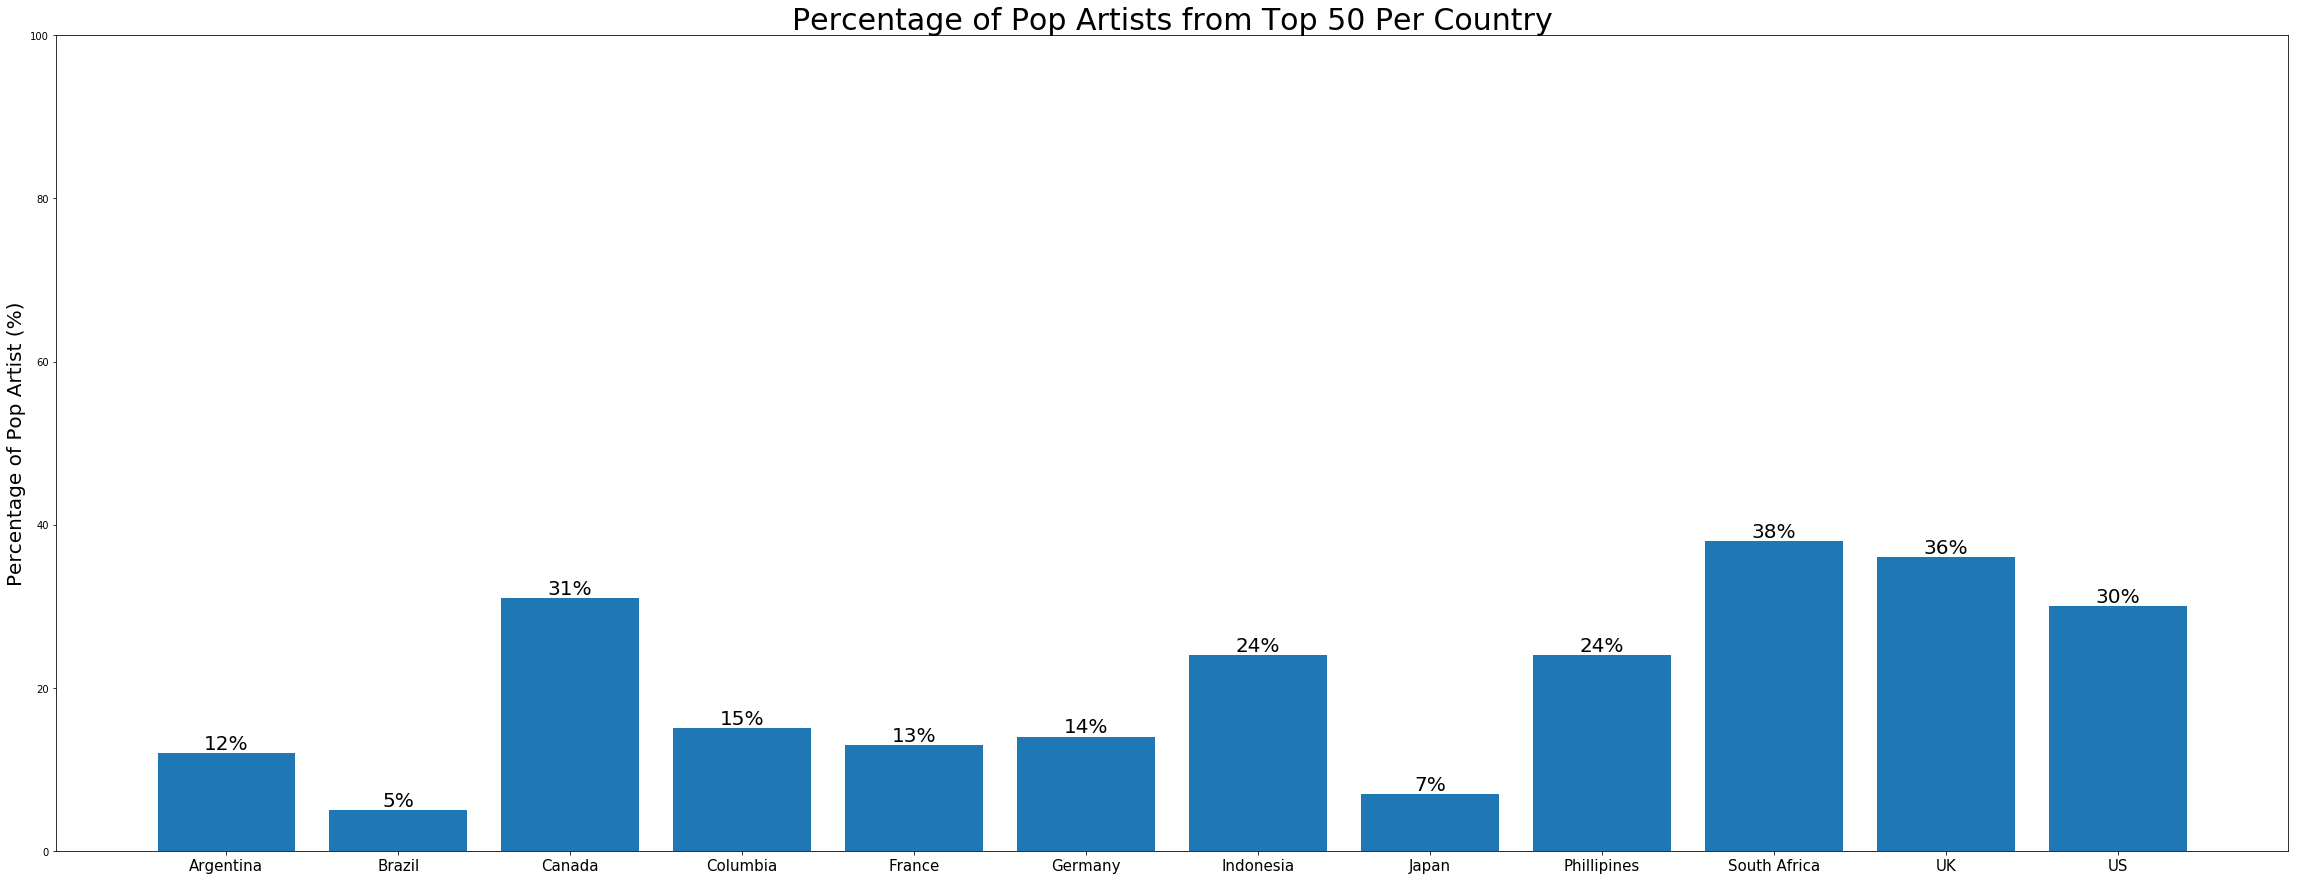

In [37]:
fig, ax = plt.subplots(figsize = (40,15))
size = fig.get_size_inches()

x_axis = np.arange(len(country))
y_axis = (np.array(pop_popularity)/50) * 100

ax.bar(x_axis, pop_popularity)
plt.xticks(x_axis, country, Fontsize = 15)
plt.ylim(0, 100)
plt.ylabel("Percentage of Pop Artist (%)", Fontsize = 20)
plt.title("Percentage of Pop Artists from Top 50 Per Country", Fontsize = 30)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    width = rect.get_x() + 0.4
    if height > 0:
        ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'bottom')
    else:
         ax.text(width, height, f'{round(height,2)}%', Fontsize = 20, ha = 'center', va = 'top')

plt.show()